# 5.1 시각화 패키지 맷플롯리브 소개

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

# 데이터 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager

# palette
import seaborn as sns
sns.set_palette("pastel")

# 주피터 노트북
%matplotlib inline

# 한글 폰트
matplotlib.font_manager._rebuild()
sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist if f.name.startswith("Malgun")])

# 폰트 설정
mpl.rc('font', family='Malgun Gothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

## 그림의 구조

### Figure 객체

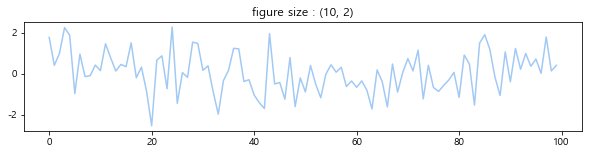

In [27]:
np.random.seed(0)
f1 = plt.figure(figsize=(10, 2))
plt.title("figure size : (10, 2)")
plt.plot(np.random.randn(100))
plt.show()

Figure(720x144) 2024965649312
Figure(432x288) 2024975494352


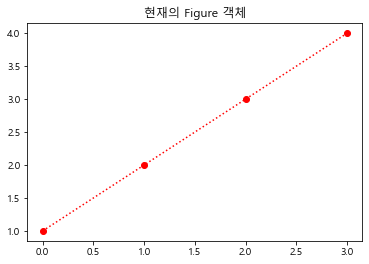

In [28]:
f2 = plt.figure(1)
plt.title("현재의 Figure 객체")
plt.plot([1, 2, 3, 4], 'ro:')

f2 = plt.gcf()
print(f1, id(f1))
print(f2, id(f2))
plt.show()

### Axes 객체와 subplot 명령

**Syntax**
```
subplot(행의 갯수, 열의 갯수, 순서)
```

**Example**
```
subplot(2, 1, 1)
# 여기에서 윗부분에 그릴 플롯 명령 실행

subplot(2, 1, 2)
# 여기에서 아랫부분에 그릴 플롯 명령 실행
```

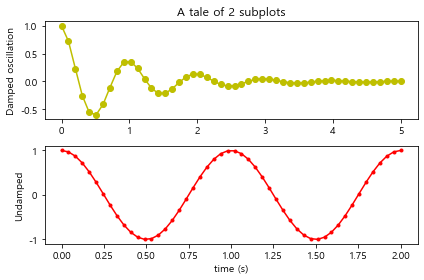

In [29]:
x1 = np.linspace(0.0, 5.0, 50)
x2 = np.linspace(0.0, 2.0, 50)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

ax1 = plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

ax2 = plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.tight_layout()
plt.show()

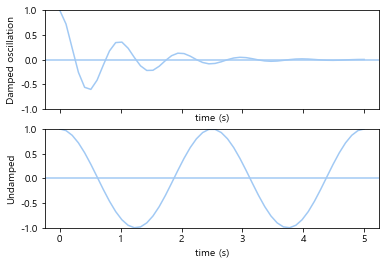

In [52]:
# for 반복문
x = np.linspace(0.0, 5.0, 50)

fig, axes = plt.subplots(2, 1, sharex=True)
for i in range(2):
    ax = axes[i]
    y = np.cos(2 * np.pi * x1) * np.exp(-x1) if i==0 else np.cos(2 * np.pi * x2)
    ylabel = 'Damped oscillation' if i==0 else 'Undamped'
    ax.plot(x, y)
    ax.axhline(0)
    ax.set_ylim(-1, 1)
    ax.set_ylabel(ylabel)
    ax.set_xlabel('time (s)')

plt.show()

이 때 subplot 의 인수는 (2,2,1)를 줄여서 221 라는 하나의 숫자로 표시할 수도 있다.

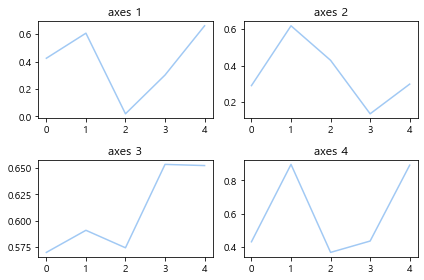

In [30]:
plt.subplot(221)
plt.plot(np.random.rand(5))
plt.title("axes 1")

plt.subplot(222)
plt.plot(np.random.rand(5))
plt.title("axes 2")

plt.subplot(223)
plt.plot(np.random.rand(5))
plt.title("axes 3")

plt.subplot(224)
plt.plot(np.random.rand(5))
plt.title("axes 4")

plt.tight_layout()
plt.show()

## 연습 문제 5.1.2

여러가지 함수를 사용하여 위와 같이 subplot들로 구성된 그림을 그려보자. 모든 subplot에 대해 xlabel, ylabel, title이 있어야 한다.

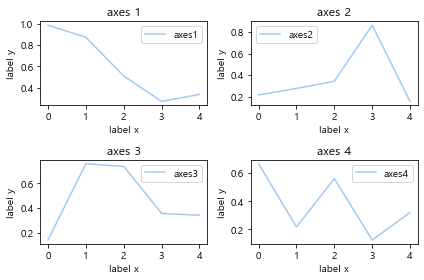

In [37]:
np.random.seed(2020)

plt.subplot(221)
plt.plot(np.random.rand(5), label="axes1")
plt.title("axes 1")
plt.xlabel('label x')
plt.ylabel('label y')
plt.legend()

plt.subplot(222)
plt.plot(np.random.rand(5), label="axes2")
plt.title("axes 2")
plt.xlabel('label x')
plt.ylabel('label y')
plt.legend()

plt.subplot(223)
plt.plot(np.random.rand(5), label="axes3")
plt.title("axes 3")
plt.xlabel('label x')
plt.ylabel('label y')
plt.legend()

plt.subplot(224)
plt.plot(np.random.rand(5), label="axes4")
plt.title("axes 4")
plt.xlabel('label x')
plt.ylabel('label y')
plt.legend()

plt.tight_layout()
plt.show()

subplots 명령으로 복수의 Axes 객체를 동시에 생성할 수도 있다. 

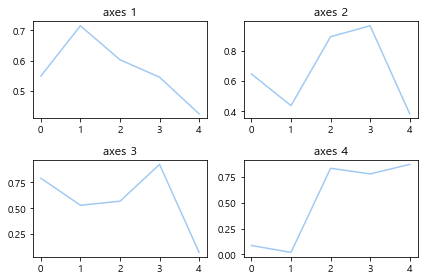

In [40]:
fig, axes = plt.subplots(2, 2)

np.random.seed(0)
axes[0, 0].plot(np.random.rand(5))
axes[0, 0].set_title("axes 1")

axes[0, 1].plot(np.random.rand(5))
axes[0, 1].set_title("axes 2")

axes[1, 0].plot(np.random.rand(5))
axes[1, 0].set_title("axes 3")

axes[1, 1].plot(np.random.rand(5))
axes[1, 1].set_title("axes 4")

plt.tight_layout()
plt.show()

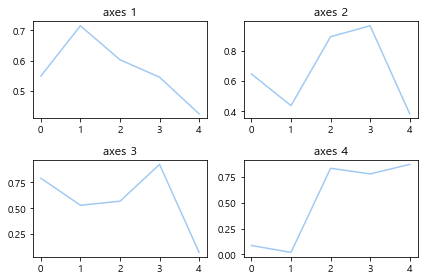

In [43]:
fig, axes = plt.subplots(2, 2)

# for 반복문 사용
np.random.seed(0)
for i in range(2):
    for k in range(2):
        ax = axes[i][k]
        ax.plot(np.random.rand(5))
        ax.set_title(f"axes {2*i+k+1}")

plt.tight_layout()
plt.show()

In [ ]:
# x축, y축 공유
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

# for 반복문 사용
np.random.seed(0)
for i in range(2):
    for k in range(2):
        ax = axes[i][k]
        ax.plot(np.random.rand(5))
        ax.set_title(f"axes {2*i+k+1}")

plt.tight_layout()
plt.show()

### Anscombe's Quartet

In [53]:
ans = sns.load_dataset('anscombe')
ans.shape

(44, 3)

In [55]:
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [56]:
ans.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

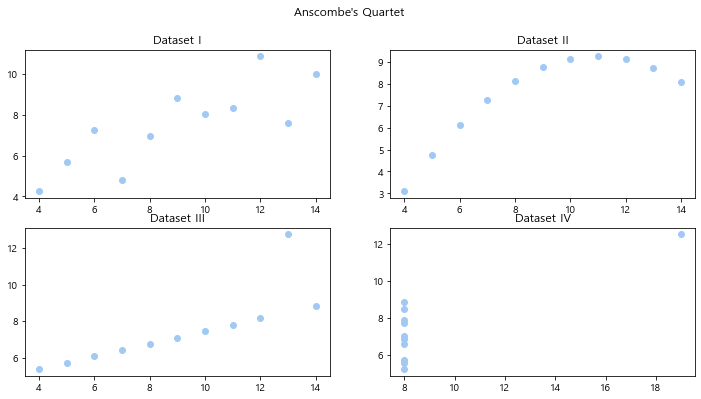

In [74]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle("Anscombe's Quartet")
fig.tight_layout()

ds1 = ans[ans.dataset == 'I']
ax1 = plt.subplot(2, 2, 1)
ax1.plot(ds1['x'], ds1['y'], 'o')
ax1.set_title('Dataset I')

ds2 = ans[ans.dataset == 'II']
ax2 = plt.subplot(2, 2, 2)
ax2.plot(ds2['x'], ds2['y'], 'o')
ax2.set_title('Dataset II')

ds3 = ans[ans.dataset == 'III']
ax3 = plt.subplot(2, 2, 3)
ax3.plot(ds3['x'], ds3['y'], 'o')
ax3.set_title('Dataset III')

ds4 = ans[ans.dataset == 'IV']
ax4 = plt.subplot(2, 2, 4)
ax4.plot(ds4['x'], ds4['y'], 'o')
ax4.set_title('Dataset IV')

plt.show()

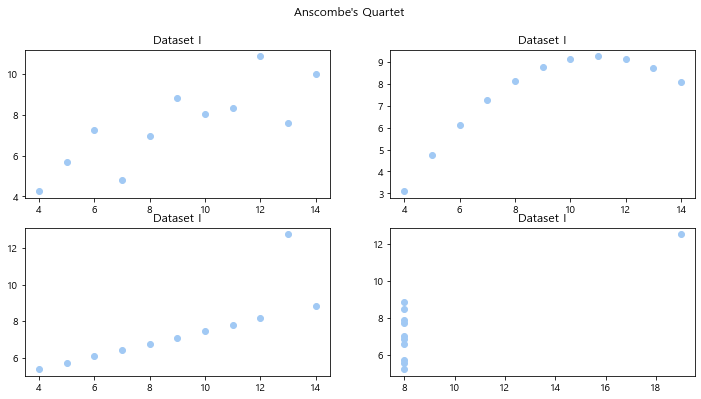

In [85]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle("Anscombe's Quartet")
fig.tight_layout()

for i, v in enumerate(ans.dataset.unique()):
    ds = ans[ans.dataset == v]
    ax = plt.subplot(2, 2, i + 1)
    ax.plot(ds['x'], ds['y'], 'o')
    ax.set_title('Dataset I')

plt.show()

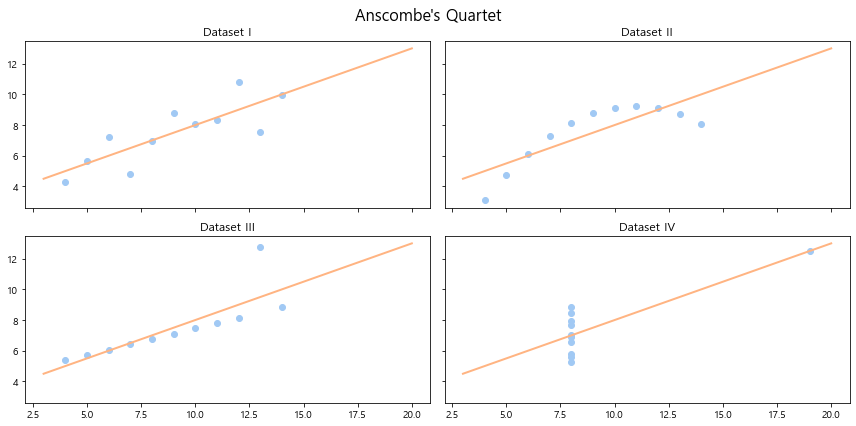

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

for i, v in enumerate(ans.dataset.unique()):
    ds = ans[ans.dataset == v]
    ax = axes[i//2][i%2]
    ax.plot(ds.x, ds.y, 'o')    
    # 회귀식: y = 0.5x + 3
    ax.plot((3,20), (4.5,13), lw=2)
    ax.set_title(f'Dataset {v}')

fig.suptitle("Anscombe's Quartet", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.9)

plt.show()

### Axis 객체와 축

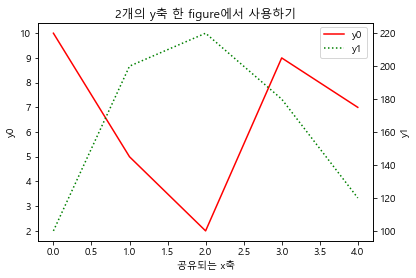

In [115]:
fig, ax0 = plt.subplots()

ax1 = ax0.twinx()

ax0.set_title("2개의 y축 한 figure에서 사용하기")
ax0.plot([10, 5, 2, 9, 7], 'r-', label="y0")
ax0.set_ylabel("y0")
ax0.grid(False)

ax1.plot([100, 200, 220, 180, 120], 'g:', label="y1")
ax1.set_ylabel("y1")
ax1.grid(False)

ax0.set_xlabel("공유되는 x축")
fig.legend(loc='upper right', bbox_to_anchor=(0.86, 0.89))

plt.show()